<a href="https://colab.research.google.com/github/sofawwg/dataset/blob/main/%D1%82%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from matplotlib.pylab import rc, plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv')

In [3]:
df = pd.merge(test,train)

In [4]:
y = test.merge(df,on='PassengerId', how = 'right')
df = train.append(y)

<ipython-input-4-3ce914ac7947>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(y)


In [5]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [6]:
#мужчины и женщины на титанике

In [7]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1.0    216
2.0    184
3.0    491
Name: PassengerId, dtype: int64

In [8]:
#билеты

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df[train.Age==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
58,59,1,2.0,"West, Miss. Constance Mirium",female,5.0,1.0,2.0,C.A. 34651,27.7500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,234,1,3.0,"Asplund, Miss. Lillian Gertrud",female,5.0,4.0,2.0,347077,31.3875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,449,1,3.0,"Baclini, Miss. Marie Catherine",female,5.0,2.0,1.0,2666,19.2583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,778,1,3.0,"Emanuel, Miss. Virginia Ethel",female,5.0,0.0,0.0,364516,12.4750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#статистика тарифов билетов

In [12]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
#братья и сестры

In [14]:
df.SibSp.unique()

array([1., 0., 3., 4., 2., 5., 8.])

In [15]:
df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [16]:
train.SibSp.describe()
test.SibSp.describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [17]:
#родители детей

In [18]:
df.Parch.unique()

array([0., 1., 2., 5., 3., 4., 6.])

In [19]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [20]:
men = df[df.Sex == "male"] 
women = df[df.Sex == "female"]

In [21]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
df = df.drop(labels=['Cabin','Name','Ticket','Embarked'], axis=1)

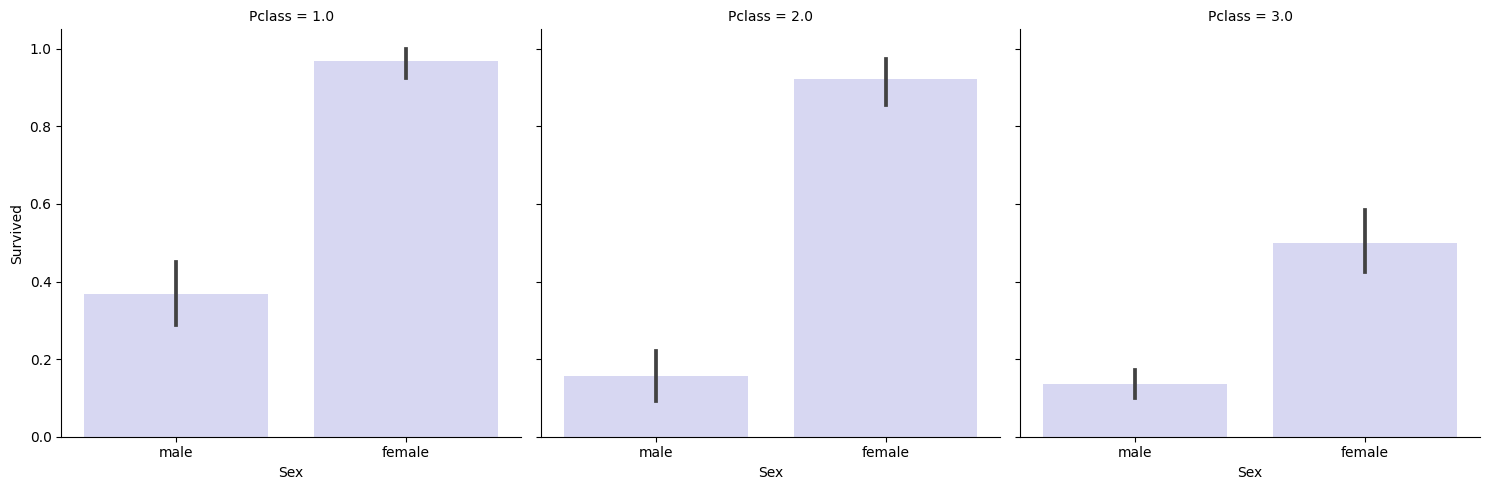

In [24]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5,  color = '#CACAFF')

In [ ]:
#пассажиров первого класса спаслось больше

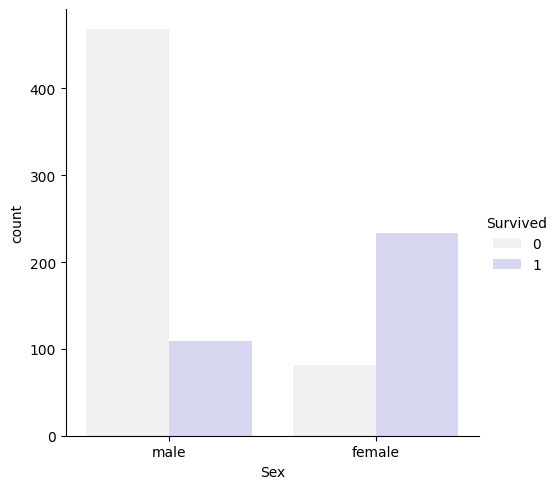

In [25]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex',
            kind='count', saturation=0.5,  color = '#CACAFF')

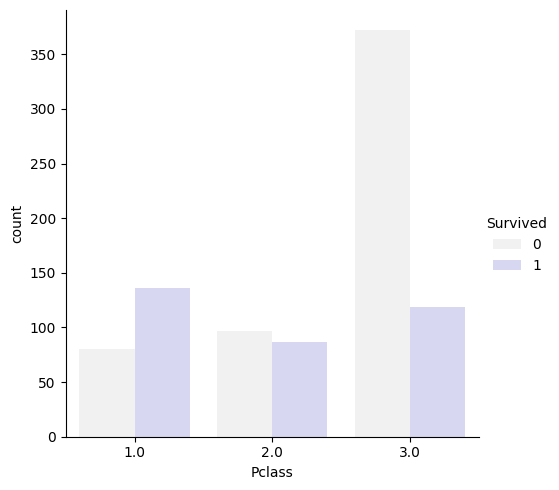

In [27]:
sns.catplot(data = df,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5,  color = '#CACAFF')

In [ ]:
#мы видим, что большинство погибших -тпассажиры 3 класса, а наибольшее выживших - 1 класс

<Axes: >

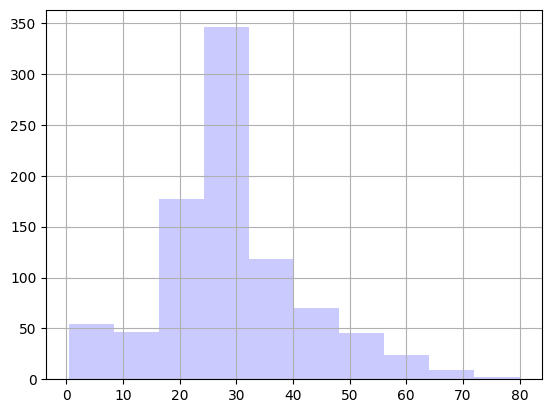

In [26]:
df.Age.hist( color = '#CACAFF')

In [ ]:
#погибло больше людей которым 30

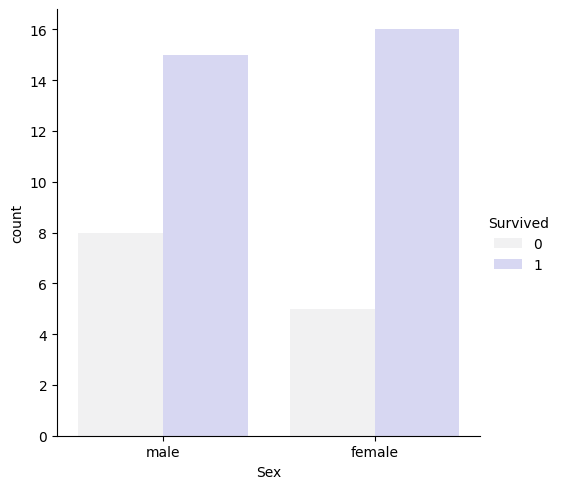

In [28]:
child= df[df.Age<6]
sns.catplot(data = child,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5,  color = '#CACAFF')

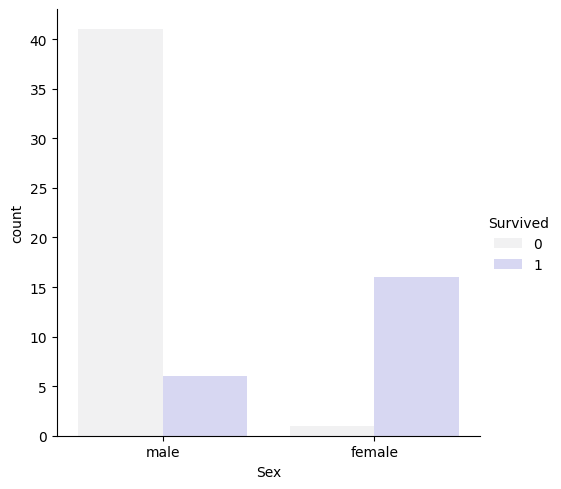

In [29]:
grand= df[df.Age>50]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5,  color = '#CACAFF')

In [ ]:
#по большинству спасали детей и женщин, так же у старых шанс умереть больше.

<ipython-input-30-32bd404828c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(test.corr())
<ipython-input-30-32bd404828c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(), annot=True, mask=matrix)


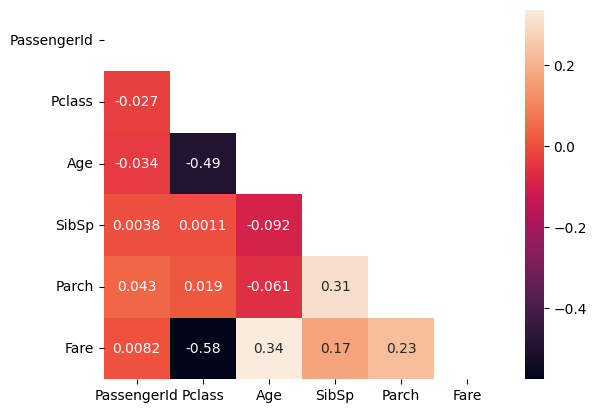

In [30]:
matrix = np.triu(test.corr())
sns.heatmap(test.corr(), annot=True, mask=matrix)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
df_y = train.drop('Name', axis=1)
df_y = df_y.drop('Ticket', axis=1)
df_y = df_y.drop('Cabin', axis=1)
df_y = df_y.drop('Survived', axis=1)
df_y = df_y.drop('PassengerId', axis=1)
from sklearn.linear_model import LogisticRegression
X =  df_y
y = train['Survived']

In [32]:
df_y.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_ = LabelEncoder()
le.fit(df_y.Sex)
list_Sex = le.transform(df_y.Sex)
df_y['Sex'] = list_Sex
le_.fit(df_y.Embarked)
list_Embarked = le_.transform(df_y.Embarked)

df_y['Embarked'] = list_Embarked

In [34]:
list_age = []
import numpy as np
for i in df_y['Age']:
  if i != np.nan:
    if i > 0:
      list_age.append(int(i))
    else:
      list_age.append(0)
df_y['Age'] = list_age
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [35]:
list_fare = []
import numpy as np
for i in df_y['Fare']:
  if i != np.nan:
    if i > 0:
      list_fare.append(int(i))
    else:
      list_fare.append(0)
df_y['Fare'] = list_fare
df_y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Fare      891 non-null    int64
 6   Embarked  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


In [36]:
x_train = train.values
y_train = df['Survived']
x_test = test.values
y_test = df['Survived']

In [37]:
logist = LogisticRegression()
logist.fit(X, y)
logist.predict(X) 

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [38]:
logist.score(X, y)

0.7901234567901234

In [39]:
fgf = tree.DecisionTreeClassifier(max_depth=3)
fgf = fgf.fit(X, y)
print(fgf.score(X, y))

0.8092031425364759


[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.125, 0.375, 'x[5] <= 28.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.0625, 0.125, 'gini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(0.1875, 0.125, 'gini = 0.039\nsamples = 100\nvalue = [2, 98]'),
 Text(0.375, 0.375, 'x[5] <= 23.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 118\nvalue = [49, 69]'),
 Text(0.4375, 0.125, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.75, 0.625, 'x[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.625, 0.375, 'x[2] <= 53.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.5625, 0.125, 'gini = 0.487\nsamples = 100\nvalue = [58, 42]'),
 Text(0.6875, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.875, 0.375, 'x[4] <= 0.5\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),


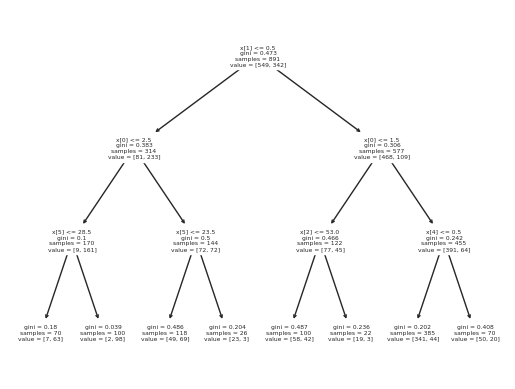

In [40]:
from sklearn.datasets import load_iris
from sklearn import tree
tree.plot_tree(fgf)

In [41]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[465  84]
 [103 239]]


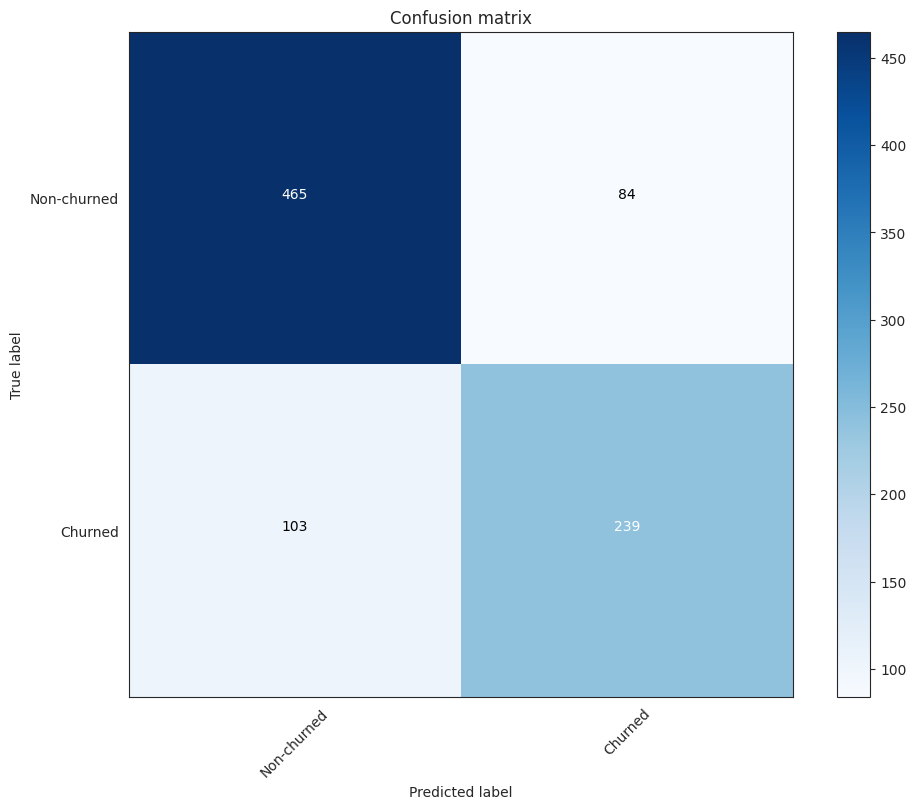

In [42]:
cnf_matrix = confusion_matrix(y, logist.predict(X))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.show()

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

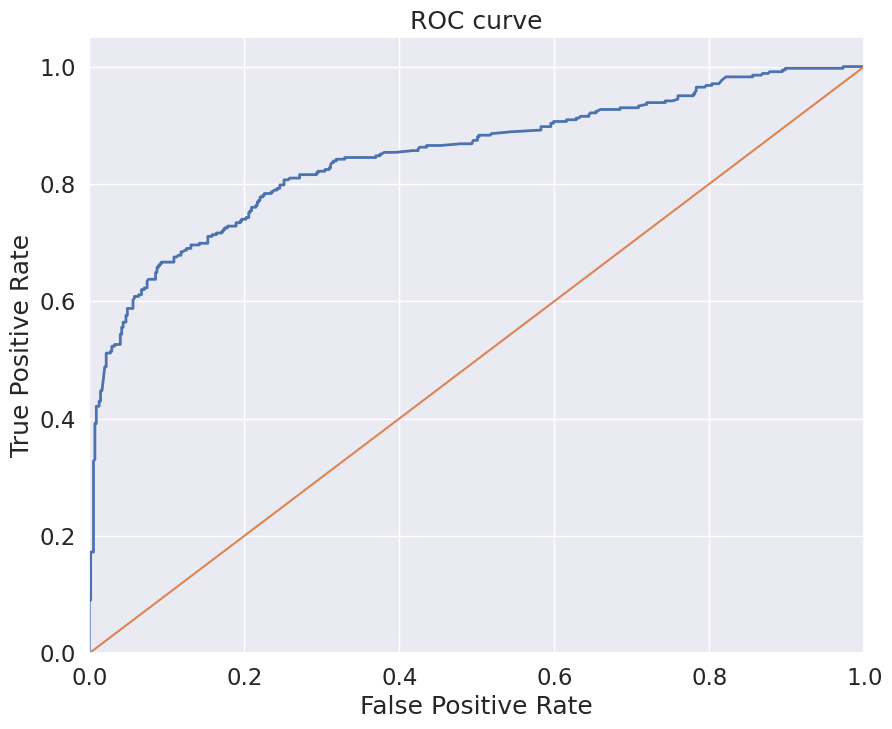

In [44]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y, logist.predict_proba(X)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()